# clustermap

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.clustermap()` библиотеки *seaborn* используется для создания тепловых карт с иерархической кластеризацией по строкам и/или столбцам. Эта функция используется для визуализации многомерных данных и поиска в них скрытых структур, таких как группы или кластеры.

Основные параметры функции:
- `data`: двумерный массив или DataFrame, который будет визуализироваться;
- `pivot_kws`: позволяет передавать дополнительные аргументы в метод pivot() pandas перед построением тепловой карты;
- `method`: метод кластеризации, такой как 'single', 'complete', 'average', 'weighted', 'centroid', 'median', или 'ward' (по умолчанию method='average');
- `metric`: метрика расстояния, используемая для вычисления расстояний между строками и/или столбцами. По умолчанию используется евклидово расстояние metric='euclidean';
- `z_score`: используется для стандартизации данных (по умолчанию z_score=None - стандартизация не производится);
standard_scale: используется для масштабирования данных перед их кластеризацией и визуализацией (по умолчанию standard_scale=None - масштабирование не производится);
- `figsize`: размер фигуры в дюймах (по умолчанию figsize=(10, 10));
- `row_cluster`: Логическое значение, определяющее, будут ли строки кластеризованы (по умолчанию row_cluster=True);
- `col_cluster`: Логическое значение, определяющее, будут ли столбцы кластеризованы (по умолчанию col_cluster=True);
- `row_linkage`: массив, определяющий иерархическую кластеризацию для строк (по умолчанию row_linkage=None);
- `col_linkage`: массив, определяющий иерархическую кластеризацию для столбцов (по умолчанию col_linkage=None);
- `row_colors` и `col_colors`: позволяют добавлять цветные аннотации к строкам и столбцам тепловой карты;
- `colors_ratio`: используется для управления соотношением между размерами аннотаций цветов (row_colors и col_colors) и основной частью тепловой карты (по умолчанию colors_ratio=0.03);
- `mask`: используется для скрытия определенных ячеек тепловой карты;
dendrogram_ratio: соотношение размеров дендрограммы к тепловой карте. Может быть кортежем для указания отдельных значений для строк и столбцов (по умолчанию dendrogram_ratio=0.2);
- `cbar_pos`: позиция цветовой шкалы. По умолчанию cbar_pos=(0.02, 0.8, 0.05, 0.18);
- `cbar_kws`: используется для настройки внешнего вида и поведения цветовой шкалы (color bar) на тепловой карте;
- `tree_kws`: позволяет настраивать внешний вид и поведение дендрограмм.

Для рассмотрения примеров, загрузим данные датасета `'mpg'`:

In [3]:
df = sns.load_dataset('mpg').dropna()

df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Содержание датафрейма:
- `'mpg'`: расход топлива, измеренный в милях на галлон (miles per gallon);
- `'cylinders'`: количество цилиндров в двигателе;
- `'displacement'`: объем двигателя, измеренный в кубических дюймах;
- `'horsepower'`: мощность двигателя, измеренная в лошадиных силах;
- `'weight'`: вес автомобиля в фунтах;
- `'acceleration'`: время разгона с 0 до 60 миль в час, измеренное в секундах;
- `'model_year'`: год выпуска модели автомобиля;
- `'origin'`: страна происхождения автомобиля (США, Европа, Япония);
- `'name'`: название модели автомобиля.

Для начала подготовим датафрейм для его передачи функции `sns.clustermap()`:

In [5]:
df_count = df.pivot_table(values='horsepower', index='cylinders', 
                     columns='origin', aggfunc='count', fill_value=0)
display(df_count)

origin     europe  japan  usa
cylinders                    
3               0      4    0
4              61     69   69
5               3      0    0
6               4      6   73
8               0      0  103

Построим диаграмму `clustermap` с параметрами по умолчанию:

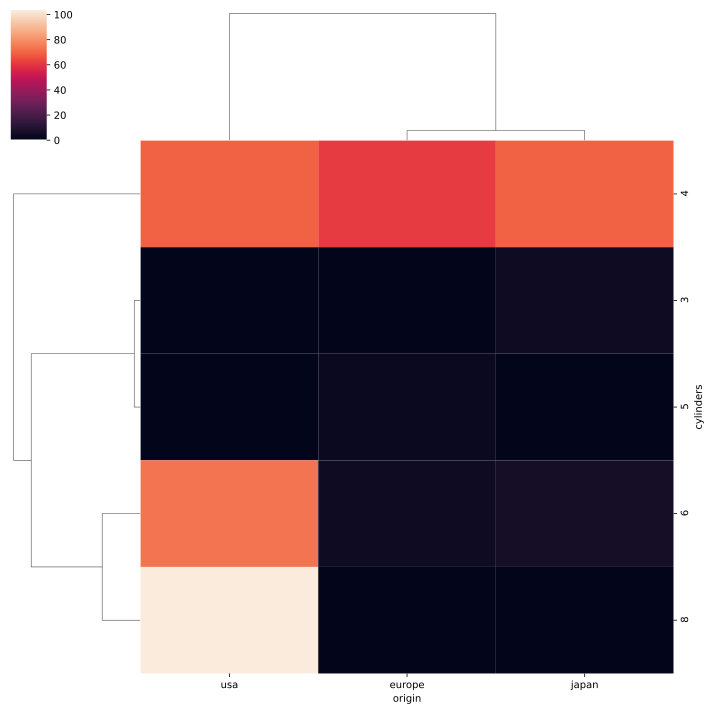

In [6]:
sns.clustermap(df_count)

plt.show()

С параметрами по умолчанию диаграмма получается большого размера, поэтому давайте уменьшим её размер при помощи параметра `figsize`, а также применим другую цветовую палитру:

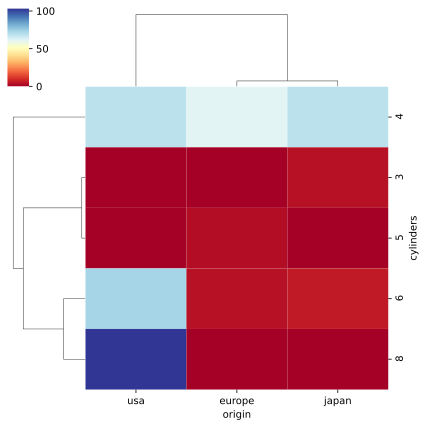

In [7]:
sns.clustermap(df_count,
               cmap='RdYlBu',
               figsize=(6, 6))
plt.show()

Отобразим аннотации `annot=True`:

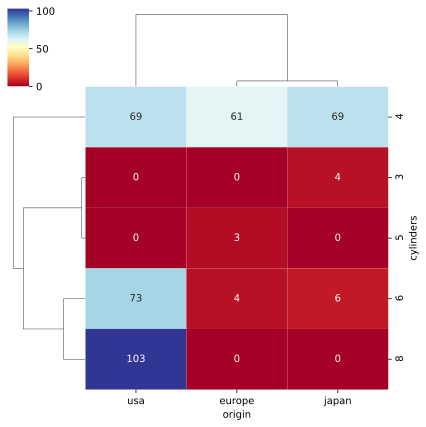

In [8]:
sns.clustermap(df_count,
               cmap='RdYlBu',
               figsize=(6, 6),
               annot=True,
               fmt='d')
plt.show()

Сверху и с левой стороны тепловой карты показаны дендрограммы. Начнём с верхней дендрограммы, которая отображает кластеризацию столбцов. Здесь показана кластеризация в два этапа. На первом этапе столбцы `'europe'` и `'japan'` объединены в один кластер, так как значения в этих столбцах ближе друг к другу, чем к данных в столбце `'usa'`. А на втором этапе кластер со столбцами `'europe'` и `'japan'` соединяется с кластером `'usa'`. Такая же логика применяется и к строкам диаграммы.

Далее давайте применим функцию `sns.clustermap()` ко всем числовым данным нашего датафрейма и посмотрим на результат:

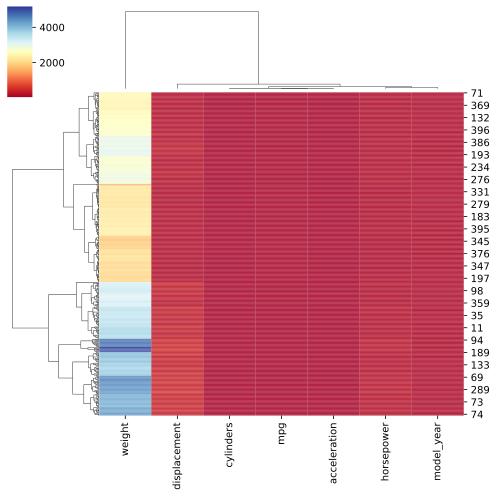

In [9]:
sns.clustermap(df.select_dtypes(include=['number']),
               cmap='RdYlBu',
               figsize=(7, 7))
plt.show()

На получившейся диаграмме, по столбцам разнесены данные из всех числовых колонок нашего датафрейма. А строки сформированы по индексам, которые отображены справа от диаграммы. На диаграмме отображаются на все метки индексов, так как в датафрейме 392 строки. Но если увеличивать размер диаграммы, то всё больше и больше меток индексов будут показаны на графике.

**Параметры row_colors и col_colors**

Параметры `row_colors` и `col_colors` в функции `sns.clustermap()` позволяют добавлять цветные аннотации к строкам и столбцам тепловой карты, что помогает визуально различать или классифицировать данные. Эти параметры принимают списки или DataFrame с цветами, которые соответствуют строкам или столбцам данных.

Так как на нашем графике отображены переменные только с числовыми значениями, то мы визуально не можем определить, к какой категории относится та или иная строка. Поэтому давайте добавим столбец `'origin'`, в котором каждый регион будет иметь свой собственный цвет.

Для начала создадим серию, которая будет содержать наименование цвета в зависимости от региона в каждой строке столбца `'origin'`:

In [10]:
origin_colors = df['origin'].map({'europe': 'SlateBlue', 
                                  'japan': 'yellow',
                                  'usa': 'SpringGreen'})
print(origin_colors[:5])

0    SpringGreen
1    SpringGreen
2    SpringGreen
3    SpringGreen
4    SpringGreen
Name: origin, dtype: object


Далее передаём эту серию параметру `row_colors`:

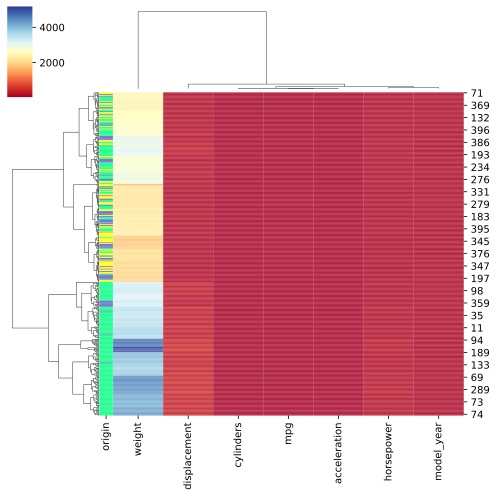

In [11]:
sns.clustermap(df.select_dtypes(include=['number']),
               cmap='RdYlBu',
               figsize=(7, 7),
               row_colors=origin_colors)
plt.show()

На тепловой карте появилась полоска `'origin'` с цветами, символизирующими определённый регион.

**Параметр standard_scale**

Параметр `standard_scale` в функции `sns.clustermap()` используется для масштабирования данных перед их кластеризацией и визуализацией в виде тепловой карты. Масштабирование данных по стандартной шкале означает, что данные преобразуются в диапазон от 0 до 1.

Параметр `standard_scale` может принимать следующие значения:
- `standard_scale=0`: Масштабирование выполняется по строкам. Каждая строка будет иметь значения в диапазоне от 0 до 1. Это может быть полезным, когда строки данных имеют разный диапазон значений, и вы хотите сравнивать строки независимо от их исходного диапазона.
- `standard_scale=1`: Масштабирование выполняется по столбцам. Для каждого столбца значения приводятся к диапазону от 0 до 1. Это может быть полезным, когда столбцы данных имеют разный диапазон значений, и вы хотите сравнивать столбцы независимо от их исходного диапазона.
- `standard_scale=None`: Масштабирование не выполняется (по умолчанию).

Для примера сделаем масштабирование по столбцам:

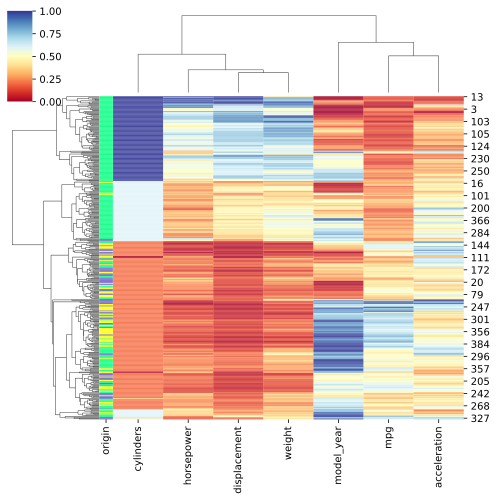

In [12]:
sns.clustermap(df.select_dtypes(include=['number']),
               cmap='RdYlBu',
               figsize=(7, 7),               
               row_colors=origin_colors,
               standard_scale=1)
plt.show()

Заметим, что рисунок изменился довольно существенным образом.

**Параметр z_score**

Параметр `z_score` в функции `sns.clustermap()` используется для стандартизации данных перед их кластеризацией и визуализацией в виде тепловой карты. Стандартизация означает преобразование данных таким образом, что они будут иметь среднее значение 0 и стандартное отклонение 1.

Параметр `z_score` может принимать следующие значения:
- `z_score=0`: Стандартизация выполняется по строкам. Для каждой строки из значений вычитается среднее значение этой строки, а затем результат делится на стандартное отклонение этой строки.
- `z_score=1`: Стандартизация выполняется по столбцам. Для каждого столбца из значений вычитается среднее значение этого столбца, а затем результат делится на стандартное отклонение этого столбца.
- `z_score=None`: Стандартизация не выполняется (по умолчанию).

Посмотрим, как будет выглядеть тепловая карта, если применить стандартизацию к столбцам:

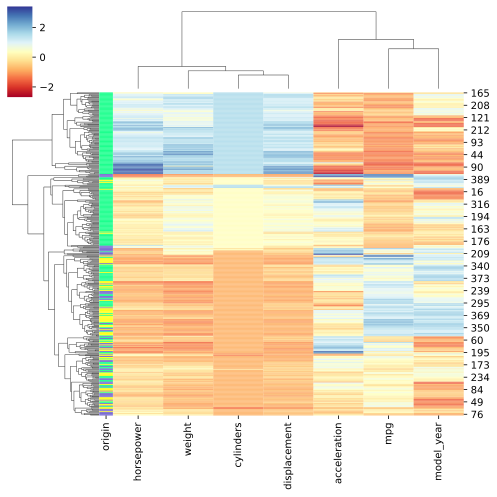

In [13]:
sns.clustermap(df.select_dtypes(include=['number']),
               cmap='RdYlBu',
               figsize=(7, 7),              
               row_colors=origin_colors,
               z_score=1)
plt.show()

**Параметр method**

Параметр `method` функции `sns.clustermap()` используется для указания метода кластеризации, который будет применяться при создании кластерной карты. Этот параметр определяет, каким образом будут вычисляться расстояния между кластерами при построении дендрограммы.

Вот основные методы кластеризации, которые можно использовать с параметром `method`:
- `single`: Одинарное связывание. Минимальное расстояние между элементами кластеров.
- `complete`: Полное связывание. Максимальное расстояние между элементами кластеров.
- `average`: Среднее связывание. Среднее расстояние между элементами кластеров (применяется по умолчанию).
- `weighted`: Взвешенное среднее связывание. Взвешенное среднее расстояние между элементами кластеров.
- `centroid`: Центроидное связывание. Расстояние между центроидами кластеров.
- `median`: Медианное связывание. Медианное расстояние между элементами кластеров.
- `ward`: Связывание по методу Уорда (Ward's linkage). Минимизирует сумму квадратов внутри кластера.

Вариант графика с одинарным связыванием:

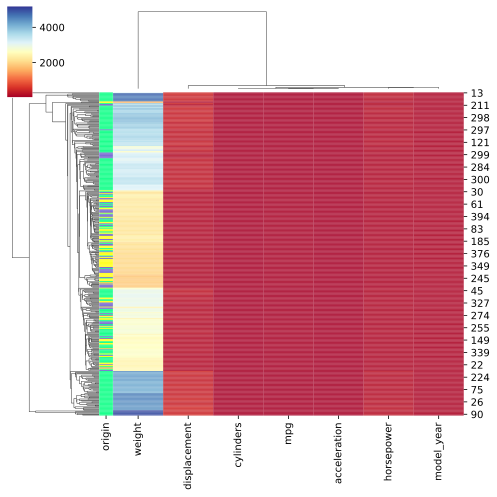

In [14]:
sns.clustermap(df.select_dtypes(include=['number']),
               cmap='RdYlBu',
               figsize=(7, 7),              
               row_colors=origin_colors,
               method='single')
plt.show()

**Параметр metric**

Параметр `metric` используется для указания метрики расстояния, которая будет применяться при вычислении расстояний между точками данных в процессе кластеризации. Этот параметр позволяет вам выбирать из множества различных метрик для определения, насколько "близки" или "далеки" друг от друга точки данных.

Вот некоторые метрики расстояния, которые можно использовать с параметром `metric`:
- `euclidean`: Евклидово расстояние.
- `minkowski`: Расстояние Минковского (обобщение евклидова и манхэттенского расстояний).
- `cityblock`: Манхэттенское расстояние.
- `chebyshev`: Расстояние Чебышева (максимальное расстояние по одной из координат).
- `seuclidean`: Стандартизированное евклидово расстояние.
- `sqeuclidean`: Квадрат евклидова расстояния.
- `cosine`: Косинусное расстояние (или косинусное сходство).
- `correlation`: Корреляционное расстояние.

Изменим расстояние с евклидова на манхэттенское:

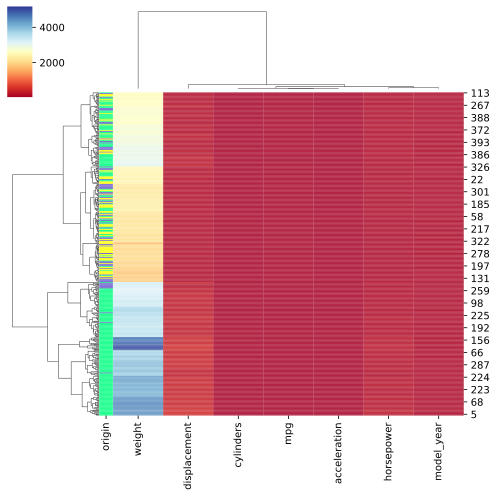

In [15]:
sns.clustermap(df.select_dtypes(include=['number']),
               cmap='RdYlBu',
               figsize=(7, 7),              
               row_colors=origin_colors,
               metric='cityblock')
plt.show()

Параметр `metric` позволяет пользователям настраивать процесс кластеризации, выбирая метрику, которая лучше всего соответствует природе их данных и задачам анализа.